Suggested dimensions for U: 30
Suggested dimensions for Y: 2
Shape of U_p: (30, 61)
Rank of U_p: 30
Condition number of U_p: 60.61965435429175
Shape of U_f: (30, 61)
Rank of U_f: 30
Condition number of U_f: 60.97218931877794
Shape of Y_p: (30, 61)
Rank of Y_p: 30
Condition number of Y_p: 1001.3113053258003
Shape of Y_f: (30, 61)
Rank of Y_f: 30
Condition number of Y_f: 1242.7567982008302
Shape of A: (90, 61)
Rank of A: 61
Condition number of A: 231.15865194994683
Shape of M: (30, 90)
Rank of M: 30
Condition number of M: 21.180481933276397
Shape of G: (30, 30)
Rank of G: 30
Condition number of G: 9206.686127213692


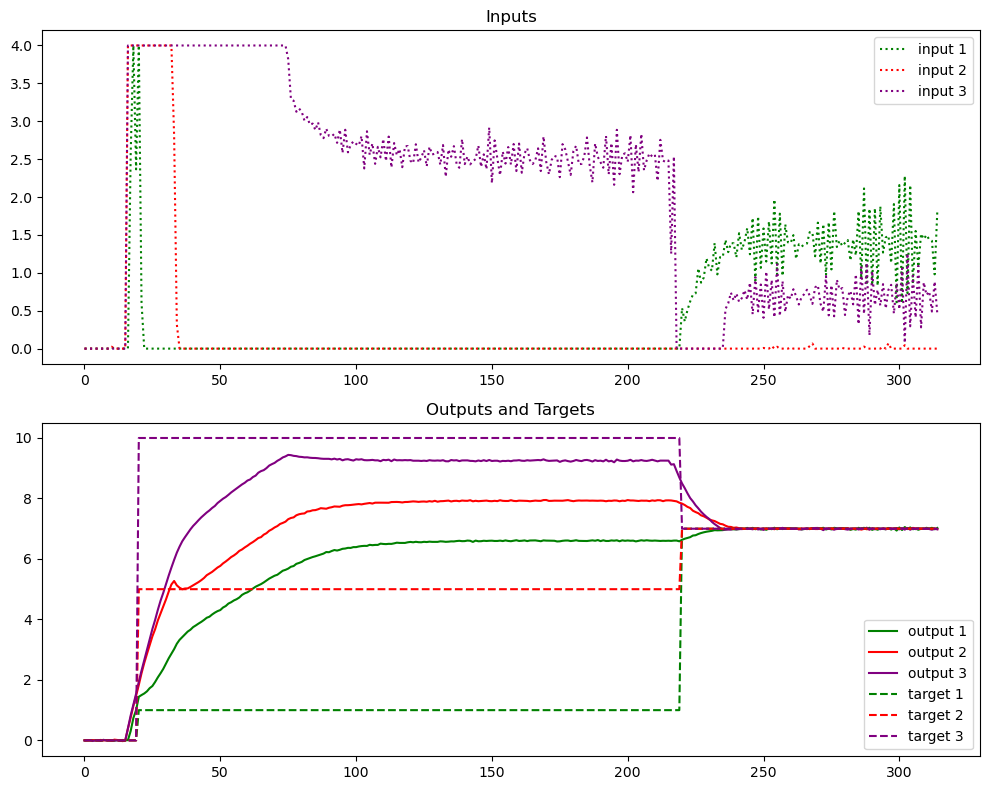

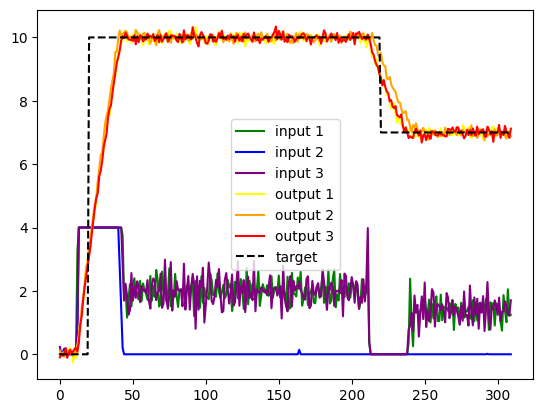

In [22]:

import numpy as np
import matplotlib.pyplot as plt
from deepc import Controller, RandomNoiseDiscreteLTI, data_quality

# Define a system
system = RandomNoiseDiscreteLTI(
    A=[[0.88, 0.1, 0.0], 
       [0.1, 0.8, 0.1], 
       [0.01, 0.1, 0.88]],
    B=[[0.01, 0, 0], 
       [0, 0.01, 0], 
       [0, 0, 0.01]],
    C=[[10, 0, 0], 
       [0, 10, 0], 
       [0, 0, 10]],
    D=[[0, 0, 0], 
       [0, 0, 0], 
       [0, 0, 0]],
    x_ini=[1, 1, 1],
   noise_std=0.01
)

# Define constraints for the input
min_input = 0
max_input = 4
constraint = lambda u: np.clip(u, min_input, max_input)

# Gather offline data
N = 500
# by defining an input sequence
u_d = np.random.uniform(min_input, max_input, (N, system.input_dim))
# and applying it to the system
y_d = system.apply_multiple(u_d)

# Define how many steps the controller should look back
# to grasp the current state of the system
T_ini = 12

# Define how many steps the controller should look forward
r_len = 7

data_quality(u_d, y_d, T_ini, r_len)

# Define the controller
controller = Controller(u_d, y_d, T_ini, r_len, input_constrain_fkt=constraint)

# Reset the system
# to sepereate the offline data from the online data
system.set_state([0, 0, 0])  # This is intentionally not the same state as x_ini

# Warm up the controller
while not controller.is_initialized():
    u = [0, 0, 0]
    y = system.apply(u)
    controller.update(u, y)

# Simulate the system
u_online = []
y_online = []
r_online = [[0, 0, 0]] * 20 + [[1, 5, 10]] * 200 + [[7, 7, 7]] * 100
for i in range(len(r_online) - r_len):
    r = r_online[i: i + r_len]
    u = controller.apply(r)[0]
    y = system.apply(u)
    controller.update(u, y)
    u_online.append(u)
    y_online.append(y)

# Plot the results
plt.plot([u[0] for u in u_online], label="input 1", color="green")
plt.plot([u[1] for u in u_online], label="input 2", color="blue")
plt.plot([u[2] for u in u_online], label="input 3", color="purple")
plt.plot([y[0] for y in y_online], label="output 1", color="yellow")
plt.plot([y[1] for y in y_online], label="output 2", color="orange")
plt.plot([y[2] for y in y_online], label="output 3", color="red")
plt.plot([r[0] for r in r_online[:len(y_online)]], label="target", color="black", linestyle="--")
plt.legend()

u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar computation problem
u_bar comput

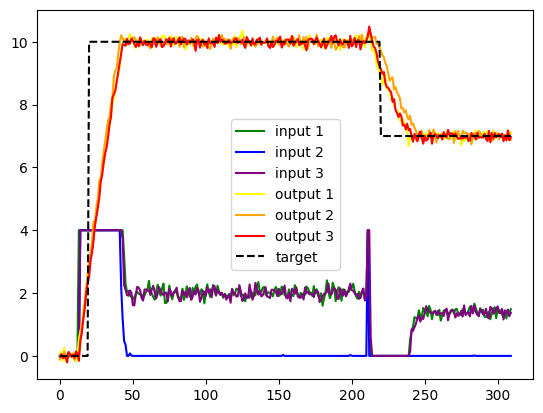

In [23]:
# Reset the system
# to sepereate the offline data from the online data
system.set_state([0, 0, 0])  # This is intentionally not the same state as x_ini

# Define a new controller
controller = Controller(u_d, y_d, T_ini, r_len, input_constrain_fkt=constraint, R=0.01)

# Warm up the controller
while not controller.is_initialized():
    u = [0, 0, 0]
    y = system.apply(u)
    controller.update(u, y)

# Simulate the system
u_online = []
y_online = []
r_online = [[0, 0, 0]] * 20 + [[10, 10, 10]] * 200 + [[7, 7, 7]] * 100
for i in range(len(r_online) - r_len):
    r = r_online[i: i + r_len]
    u = controller.apply_trajectory_tracking_version(r)[0]
    y = system.apply(u)
    controller.update(u, y)
    u_online.append(u)
    y_online.append(y)

# Plot the results
plt.plot([u[0] for u in u_online], label="input 1", color="green")
plt.plot([u[1] for u in u_online], label="input 2", color="blue")
plt.plot([u[2] for u in u_online], label="input 3", color="purple")
plt.plot([y[0] for y in y_online], label="output 1", color="yellow")
plt.plot([y[1] for y in y_online], label="output 2", color="orange")
plt.plot([y[2] for y in y_online], label="output 3", color="red")
plt.plot([r[0] for r in r_online[:len(y_online)]], label="target", color="black", linestyle="--")
plt.legend()

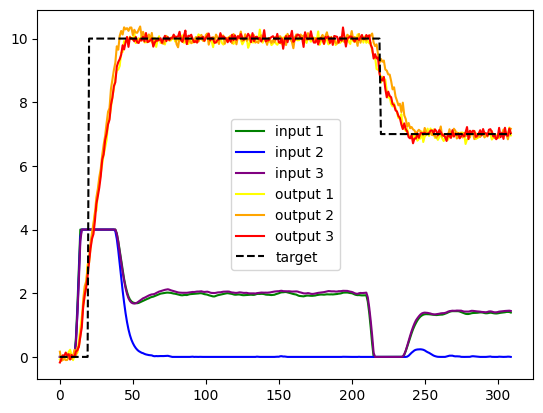

In [24]:
# If you prefer a calmer controller, you can use a higher R value to penalize input changes.

# Reset the system
# to sepereate the offline data from the online data
system.set_state([0, 0, 0])  # This is intentionally not the same state as x_ini

# Define a new controller
controller = Controller(u_d, y_d, T_ini, r_len, input_constrain_fkt=constraint, R=1)

# Warm up the controller
while not controller.is_initialized():
    u = [0, 0, 0]
    y = system.apply(u)
    controller.update(u, y)

# Simulate the system
last_u = None  # This is the only change to the previous simulation
u_online = []
y_online = []
r_online = [[0, 0, 0]] * 20 + [[10, 10, 10]] * 200 + [[7, 7, 7]] * 100
for i in range(len(r_online) - r_len):
    r = r_online[i: i + r_len]
    u = controller.apply(r, last_u)[0]
    last_u = [u] * len(r)
    y = system.apply(u)
    controller.update(u, y)
    u_online.append(u)
    y_online.append(y)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot inputs on the first subplot
ax1.plot([u[0] for u in u_online], label="input 1", color="green", linestyle=":")
ax1.plot([u[1] for u in u_online], label="input 2", color="red", linestyle=":")
ax1.plot([u[2] for u in u_online], label="input 3", color="purple", linestyle=":")
ax1.set_title('Inputs')
ax1.legend()

# Plot outputs and targets on the second subplot
ax2.plot([y[0] for y in y_online], label="output 1", color="green")
ax2.plot([y[1] for y in y_online], label="output 2", color="red")
ax2.plot([y[2] for y in y_online], label="output 3", color="purple")
ax2.plot([r[0] for r in r_online[:len(y_online)]], label="target 1", color="green", linestyle="--")
ax2.plot([r[1] for r in r_online[:len(y_online)]], label="target 2", color="red", linestyle="--")
ax2.plot([r[2] for r in r_online[:len(y_online)]], label="target 3", color="purple", linestyle="--")
ax2.set_title('Outputs and Targets')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
